In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [1]:
import pyarrow.parquet as pq

In [3]:
folder_path = "/Users/hy/StaDS/23-24 spring/mda/project/MDA/MDA/dataset"
files = os.listdir(folder_path)

In [4]:
cad9_loc = pd.read_parquet(f"{folder_path}/cad9.parquet.gzip", engine="pyarrow")


For cad9

In [5]:
cad9_loc.head(10)

,province,Mission ID,Service Name,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,...,Name destination hospital,Intervention time (T1Reported),Intervention time (T1Confirmed),Departure time (T1Reported),Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID
0,VBR,21221520003,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P034 - SCHEDELTRAUMA,/,...,HV UR VILV AZ JAN PORTAELS,10.0,NaN,2.0,NaN,21221520003 1969661672,19189868,21221520003,240.0,MVVILV101
1,VBR,21221520004,MV HVP HALL West,50.743200,4.241053,AVHALL02A,ZW HALLE 2,Ambulance,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,HV UR HALL AZ ST MARIA,7.0,NaN,3.0,NaN,21221520004 1969661709,19189847,21221520004,240.0,MVHALL102
2,VBR,21221520007,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,/,...,HV UR VILV AZ JAN PORTAELS,10.0,NaN,4.0,NaN,21221520007 1969664866,19190011,21221520007,240.0,MVVILV101
3,VBR,21221520007,HV UR VILV AZ Jan Portaels,50.926869,4.420968,UVVILV01A,MUG VILVOORDE,MUG,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,/,...,HV UR VILV AZ JAN PORTAELS,7.0,NaN,1.0,NaN,21221520007 1969665019,19190053,21221520007,0.0,MVVILV301
4,VBR,21221520008,BB BRUX Hôpital Militair KA,50.905331,4.387662,ABBRUX13A,AMB HMB 13,Ambulance,P020 - INTOXICATIE ALCOHOL,/,...,None,14.0,NaN,7.0,NaN,21221520008 1969665449,19189967,21221520008,39.0,MBMILH101
5,VBR,21221520012,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P075 - ONCOLOGISCHE PATIËNT IN BEHANDELING,/,...,HB UR BRUX UZ,13.0,NaN,3.0,NaN,21221520012 1969669593,19190140,21221520012,240.0,MVVILV101
6,VBR,21221520013,BV LEUV 112 Hageland,50.869703,4.723870,AVLEUV02A,ZW HEVERLEE 2,Ambulance,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),/,...,HV UR LEUV RZ HEILIG HART,12.0,NaN,2.0,NaN,21221520013 1969669643,19190103,21221520013,254.0,MVLEUV102
7,VBR,21221520014,HB UR BRUX UZ,50.885497,4.309564,UBJETT01A,SMUR UZ BRUXELLES 1,MUG,P011 - PIJN OP DE BORST,/,...,HO UR AALS OLV,17.0,NaN,4.0,NaN,21221520014 1969669986,19190171,21221520014,0.0,MBUZBR301
8,VBR,21221520014,MV HVP ASSE West,50.907977,4.209911,AVASSE01A,ZW ASSE 1,Ambulance,P011 - PIJN OP DE BORST,/,...,HO UR AALS OLV,17.0,NaN,4.0,NaN,21221520014 1969669987,19190167,21221520014,240.0,MVASSE101
9,VBR,21221520015,HV UR LEUV UZ Gasthuisberg,50.877462,4.674310,UVLEUV01A,MUG LEUVEN 1,MUG,P016 - ZWANGERSCHAP-BEVALLING,/,...,HV UR LEUV UZ GASTHUISBERG,8.0,NaN,3.0,NaN,21221520015 1969670377,19190090,21221520015,0.0,MVLEUV301


In [6]:
cad9_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289401 entries, 0 to 289400
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   province                         289401 non-null  object 
 1   Mission ID                       289401 non-null  int64  
 2   Service Name                     196821 non-null  object 
 3   Latitude permanence              233726 non-null  float64
 4   Longitude permanence             233726 non-null  float64
 5   Permanence short name            289204 non-null  object 
 6   Permanence long name             196821 non-null  object 
 7   Vector Type                      289401 non-null  object 
 8   EventType Trip                   289343 non-null  object 
 9   EventSubType Trip                289401 non-null  object 
 10  EventLevel Trip                  289331 non-null  object 
 11  CityName intervention            289277 non-null  object 
 12  Ci

for the time variable

In [7]:
drop_time=['T1','T1confirmed','T2','T3','T4','T5','T7']
cad9=cad9_loc.drop(columns=drop_time)

In [8]:
## for the whole intervention time, change the date style

cad9['T0']=pd.to_datetime(cad9['T0'])
cad9['T6']=pd.to_datetime(cad9['T6'])

In [9]:
periods={
    (8, 10): 'morning',
    (11, 13): 'noon',
    (14, 16): 'afternoon',
    (17, 20): 'evening',
    (21, 23): 'night',
    (0, 7): 'midnight'
}
def map_to_period(time):
    for period_range, period_name in periods.items():
        if period_range[0] <= time.hour <= period_range[1]:
            return period_name
    return None
cad9['time_period']=cad9['T0'].apply(map_to_period)


In [10]:
## whole intervention time as minute unit
cad9['time_intervention']=(cad9['T6']-cad9['T0']).dt.seconds//60

In [11]:
cad9.isna().sum()

province                                0
Mission ID                              0
Service Name                        92580
Latitude permanence                 55675
Longitude permanence                55675
Permanence short name                 197
Permanence long name                92580
Vector Type                             0
EventType Trip                         58
EventSubType Trip                       0
EventLevel Trip                        70
CityName intervention                 124
CitysectionName intervention         4205
Latitude intervention                   1
Longitude intervention                  1
Province invervention                  98
T0                                   3718
T6                                  15623
Name destination hospital           62987
Intervention time (T1Reported)      25870
Intervention time (T1Confirmed)    178992
Departure time (T1Reported)         22177
Departure time (T1Confirmed)       177747
UI                                

In [12]:
cad9.dropna(subset=['time_intervention'], inplace=True)

In [12]:
cad9

,province,Mission ID,Service Name,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,...,Intervention time (T1Confirmed),Departure time (T1Reported),Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID,time_period,time_intervention
0,VBR,21221520003,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P034 - SCHEDELTRAUMA,/,...,NaN,2.0,NaN,21221520003 1969661672,19189868,21221520003,240.0,MVVILV101,midnight,44.0
1,VBR,21221520004,MV HVP HALL West,50.743200,4.241053,AVHALL02A,ZW HALLE 2,Ambulance,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,NaN,3.0,NaN,21221520004 1969661709,19189847,21221520004,240.0,MVHALL102,midnight,38.0
2,VBR,21221520007,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,/,...,NaN,4.0,NaN,21221520007 1969664866,19190011,21221520007,240.0,MVVILV101,afternoon,582.0
3,VBR,21221520007,HV UR VILV AZ Jan Portaels,50.926869,4.420968,UVVILV01A,MUG VILVOORDE,MUG,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,/,...,NaN,1.0,NaN,21221520007 1969665019,19190053,21221520007,0.0,MVVILV301,afternoon,582.0
5,VBR,21221520012,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P075 - ONCOLOGISCHE PATIËNT IN BEHANDELING,/,...,NaN,3.0,NaN,21221520012 1969669593,19190140,21221520012,240.0,MVVILV101,midnight,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289391,OVL,40231510941,MO HVP AALS Zuid Oost,50.939295,4.033428,AOAALS01A,ZW AALST 1,Ambulance,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,9.0,3.0,1.0,40231510941 2001194795,21356717,40231510941,465.0,MOAALS101,night,47.0
289392,OVL,40231510946,HO UR GERA ASZ,50.771134,3.877332,UOGERA01A,MUG GERAARDSBERGEN,MUG,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),/,...,15.0,2.0,0.0,40231510946 2001195317,21356718,40231510946,0.0,UOGERA01A,night,66.0
289393,OVL,40231510946,MO HVP NINO Zuid Oost,50.834325,4.027432,AONINO01A,ZW NINOVE 1,Ambulance,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),/,...,15.0,2.0,0.0,40231510946 2001195319,21356788,40231510946,465.0,MONINO101,night,66.0
289394,OVL,40231510952,BO GENT [Gentbrugge] Life Care,51.035809,3.755554,AOGENT05A,ZW GENT 5,Ambulance,P012 - NIET-TRAUMATISCHE BUIKLAST,/,...,8.0,2.0,2.0,40231510952 2001196683,21356744,40231510952,458.0,MOLIFE102,night,23.0


In [13]:
cad9[cad9.duplicated(subset=['Mission ID','Vector Type','Name destination hospital','Latitude permanence','Longitude permanence'])]


,province,Mission ID,Service Name,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,...,Intervention time (T1Confirmed),Departure time (T1Reported),Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID,time_period,time_intervention
125,VBR,21221520238,MV HVP VILV West,50.925277,4.423057,AVVILV02A,ZW VILVOORDE 2,Ambulance,P001 - VERKEERSONGEVAL,/,...,NaN,1.0,NaN,21221520238 1969714841,19192886,21221520238,240.0,MVVILV102,afternoon,72.0
243,VBR,21221530068,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,NaN,NaN,NaN,21221530068 1969778764,19196325,21221530068,240.0,MVVILV101,morning,48.0
400,VBR,21221530327,HA UR MECH AZ St Maarten,51.049449,4.479964,AAMECH02A,ZW MECHELEN 2,Ambulance,P033 - TRAUMA,/,...,NaN,6.0,NaN,21221530327 1969812416,19199740,21221530327,104.0,MAMECH102,evening,3.0
935,VBR,21221550549,MV HVP HALL West,50.743200,4.241053,AVHALL02A,ZW HALLE 2,Ambulance,P020 - INTOXICATIE ALCOHOL,/,...,NaN,2.0,NaN,21221550549 1970004837,19213441,21221550549,240.0,MVHALL102,night,37.0
1283,VBR,21221580184,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P068 - UROGENITAAL PROBLEEM,/,...,NaN,15.0,NaN,21221580184 1970222249,19227846,21221580184,240.0,MVVILV101,noon,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287704,OVL,40231460817,BO GENT [Gentbrugge] Life Care,51.035809,3.755554,AOGENT04A,ZW GENT 4,Ambulance,P019 - BEWUSTELOOS - COMA - SYNCOPE,/,...,31.0,2.0,2.0,40231460817 2000755530,21324542,40231460817,458.0,MOLIFE101,night,57.0
287943,OVL,40231470669,BO LOCH 112 Lochristi,51.097770,3.830819,AOLOCH01A,ZW LOCHRISTI 1,Ambulance,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),/,...,6.0,3.0,2.0,40231470669 2000827009,21329646,40231470669,402.0,MOLOCH101,evening,74.0
288210,OVL,40231480372,MO HVP AALS Zuid Oost,50.939295,4.033428,AOAALS02A,ZW AALST 2,Ambulance,P033 - TRAUMA,/,...,6.0,1.0,1.0,40231480372 2000900109,21334751,40231480372,465.0,MOAALS102,noon,47.0
288548,OVL,40231490260,MO HVP AALS Zuid Oost,50.939295,4.033428,AOAALS02A,ZW AALST 2,Ambulance,P015 - EPILEPSIE - STUIPEN,/,...,16.0,4.0,3.0,40231490260 2000980587,21340773,40231490260,465.0,MOAALS102,noon,53.0


In [14]:
#check one row ensure the vector type
cad9[cad9['Mission ID']==21221520238].iloc[:,:]

,province,Mission ID,Service Name,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,...,Intervention time (T1Confirmed),Departure time (T1Reported),Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID,time_period,time_intervention
124,VBR,21221520238,MV HVP VILV West,50.925277,4.423057,AVVILV03A,ZW VILVOORDE 3,Ambulance,P001 - VERKEERSONGEVAL,/,...,NaN,19.0,NaN,21221520238 1969713725,19192895,21221520238,240.0,MVVILV103,afternoon,72.0
125,VBR,21221520238,MV HVP VILV West,50.925277,4.423057,AVVILV02A,ZW VILVOORDE 2,Ambulance,P001 - VERKEERSONGEVAL,/,...,NaN,1.0,NaN,21221520238 1969714841,19192886,21221520238,240.0,MVVILV102,afternoon,72.0


In [15]:
cad9=cad9.drop_duplicates(subset=['Mission ID','Vector Type','Name destination hospital','Latitude permanence','Longitude permanence'])


In [16]:
cad9[cad9.duplicated(subset=['Mission ID','Vector Type','Latitude intervention','Longitude intervention'])]



,province,Mission ID,Service Name,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,...,Intervention time (T1Confirmed),Departure time (T1Reported),Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID,time_period,time_intervention
175,VBR,21221520379,HV UR LEUV UZ Gasthuisberg,50.877462,4.674310,UVLEUV01A,MUG LEUVEN 1,MUG,P019 - BEWUSTELOOS - COMA - SYNCOPE,/,...,NaN,NaN,NaN,21221520379 1969732072,19194567,21221520379,0.0,MVLEUV301,evening,6.0
185,VBR,21221520395,HA UR MECH AZ St Maarten,51.049449,4.479964,AAMECH02A,ZW MECHELEN 2,Ambulance,P012 - NIET-TRAUMATISCHE BUIKLAST,/,...,NaN,24.0,NaN,21221520395 1969737540,19194911,21221520395,104.0,MAMECH102,night,62.0
241,VBR,21221530067,BB BRUX Hôpital Militair KA,50.905331,4.387662,UBBRUX04A,SMUR HMB 4,MUG,P035 - KOORTSSTUIPEN KIND <7JAAR,/,...,NaN,NaN,NaN,21221530067 1969779644,19196236,21221530067,0.0,MBHMRA302,morning,131.0
266,VBR,21221530103,BV LIED AMBUCE,50.867679,4.097395,AVLIED01A,ZW LIEDEKERKE,Ambulance,P004 - CVA-TIA,/,...,NaN,4.0,NaN,21221530103 1969783055,19196904,21221530103,38.0,MVLIED101,morning,79.0
299,VBR,21221530147,MV HVP VILV West,50.925277,4.423057,AVVILV03A,ZW VILVOORDE 3,Ambulance,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,NaN,NaN,NaN,21221530147 1969789681,19197556,21221530147,240.0,MVVILV103,noon,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288378,OVL,40231480887,MO HVP NINO Zuid Oost,50.834325,4.027432,AONINO01A,ZW NINOVE 1,Ambulance,P002 - AGRESSIE - VECHTPARTIJ - VERKRACHTING,/,...,1.0,1.0,1.0,40231480887 2000931723,21337898,40231480887,465.0,MONINO101,night,66.0
288619,OVL,40231490439,MO HVP TEMS Waasland,51.124648,4.215220,AOTEMS01A,ZW TEMSE,Ambulance,P034 - SCHEDELTRAUMA,/,...,15.0,5.0,4.0,40231490439 2000994261,21341976,40231490439,460.0,MOTEMS101,afternoon,76.0
288867,OVL,40231500260,MO HVP KRUB Waasland,51.170531,4.312395,AOKRUB01A,ZW KRUIBEKE,Ambulance,P026 - ONWEL ZONDER DUIDELIJKE FOCUS,/,...,12.0,3.0,2.0,40231500260 2001064076,21346829,40231500260,460.0,MOKRUB101,morning,81.0
288968,OVL,40231500574,HO UR RONS AZ Glorieux,50.754679,3.600722,UORONS01A,MUG RONSE,MUG,P019 - BEWUSTELOOS - COMA - SYNCOPE,/,...,8.0,3.0,3.0,40231500574 2001082547,21348577,40231500574,0.0,UORONS01A,afternoon,46.0


In [17]:
cad9=cad9.sort_values(['Mission ID','Vector Type','time_intervention'])

In [18]:
cad9[cad9['Mission ID']==21221520379].iloc[:,5:]

,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,EventLevel Trip,CityName intervention,CitysectionName intervention,Latitude intervention,Longitude intervention,...,Intervention time (T1Confirmed),Departure time (T1Reported),Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID,time_period,time_intervention
173,AVAARS01A,ZW AARSCHOT,Ambulance,P019 - BEWUSTELOOS - COMA - SYNCOPE,/,N3,SCHERPENHEUVEL-ZICHEM,TESTELT,51.023486,4.947832,...,NaN,NaN,NaN,21221520379 1969731918,19194569,21221520379,254.0,MVAARS101,evening,6.0
175,UVLEUV01A,MUG LEUVEN 1,MUG,P019 - BEWUSTELOOS - COMA - SYNCOPE,/,N3,SCHERPENHEUVEL-ZICHEM,TESTELT,51.023486,4.947832,...,NaN,NaN,NaN,21221520379 1969732072,19194567,21221520379,0.0,MVLEUV301,evening,6.0
174,UVLEUV02A,MUG LEUVEN 2,MUG,P019 - BEWUSTELOOS - COMA - SYNCOPE,/,N3,SCHERPENHEUVEL-ZICHEM,TESTELT,51.023486,4.947832,...,20.0,4.0,1.0,21221520379 1969731964,19194113,21221520379,0.0,MVLEUV302,evening,115.0


In [19]:
cad9=cad9.drop_duplicates(subset=['Mission ID','Vector Type','Latitude intervention','Longitude intervention'],keep='last')



In [20]:
cad9[cad9.duplicated('Mission ID')]

,province,Mission ID,Service Name,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,...,Intervention time (T1Confirmed),Departure time (T1Reported),Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID,time_period,time_intervention
3,VBR,21221520007,HV UR VILV AZ Jan Portaels,50.926869,4.420968,UVVILV01A,MUG VILVOORDE,MUG,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,/,...,NaN,1.0,NaN,21221520007 1969665019,19190053,21221520007,0.0,MVVILV301,afternoon,582.0
7,VBR,21221520014,HB UR BRUX UZ,50.885497,4.309564,UBJETT01A,SMUR UZ BRUXELLES 1,MUG,P011 - PIJN OP DE BORST,/,...,NaN,4.0,NaN,21221520014 1969669986,19190171,21221520014,0.0,MBUZBR301,midnight,79.0
9,VBR,21221520015,HV UR LEUV UZ Gasthuisberg,50.877462,4.674310,UVLEUV01A,MUG LEUVEN 1,MUG,P016 - ZWANGERSCHAP-BEVALLING,/,...,NaN,3.0,NaN,21221520015 1969670377,19190090,21221520015,0.0,MVLEUV301,midnight,45.0
15,VBR,21221520022,BB BRUX Hôpital Militair KA,50.905331,4.387662,UBBRUX04A,SMUR HMB 4,MUG,P033 - TRAUMA,/,...,NaN,5.0,NaN,21221520022 1969680264,19190364,21221520022,0.0,MBHMRA302,midnight,63.0
21,VBR,21221520029,HV UR LEUV UZ Gasthuisberg,50.877462,4.674310,UVLEUV01A,MUG LEUVEN 1,MUG,P013 - NIET-TRAUMATISCHE RUGPIJN,/,...,NaN,3.0,NaN,21221520029 1969684403,19190446,21221520029,0.0,MVLEUV301,midnight,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289377,OVL,40231510919,MO HVP BEVE Waasland,51.210718,4.259800,POBEVE01A,PIT BEVEREN 1,PIT,P031 - PSYCHIATRISCH PROBLEEM,/,...,0.0,11.0,2.0,40231510919 2001191611,21356603,40231510919,460.0,MOBEVE101,night,56.0
289384,OVL,40231510931,HO UR SNIK AZ Nikolaas,51.162627,4.149396,UOSNIK01A,MUG SINT NIKLAAS,MUG,P020 - INTOXICATIE ALCOHOL,/,...,11.0,3.0,2.0,40231510931 2001193784,21356632,40231510931,0.0,UOSNIK01A,night,49.0
289386,OVL,40231510933,HO UR DENM AZ St Blasius,51.027701,4.114972,UODENM01A,MUG DENDERMONDE,MUG,P099 - INTERHOSPITAALTRANSPORT,/,...,5.0,3.0,2.0,40231510933 2001194215,21356689,40231510933,0.0,UODENM01A,night,45.0
289390,OVL,40231510941,HO UR AALS ASZ,50.936592,4.019092,UOAALS02A,MUG AALST 2,MUG,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,9.0,3.0,1.0,40231510941 2001194793,21356685,40231510941,0.0,UOAALS02A,night,47.0


In [21]:
cad9[cad9['Mission ID']==21221520029]

,province,Mission ID,Service Name,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,...,Intervention time (T1Confirmed),Departure time (T1Reported),Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID,time_period,time_intervention
20,VBR,21221520029,BV LEUV 112 Hageland,50.869703,4.72387,AVLEUV02A,ZW HEVERLEE 2,Ambulance,P013 - NIET-TRAUMATISCHE RUGPIJN,/,...,NaN,23.0,NaN,21221520029 1969683238,19190497,21221520029,254.0,MVLEUV102,midnight,78.0
21,VBR,21221520029,HV UR LEUV UZ Gasthuisberg,50.877462,4.67431,UVLEUV01A,MUG LEUVEN 1,MUG,P013 - NIET-TRAUMATISCHE RUGPIJN,/,...,NaN,3.0,NaN,21221520029 1969684403,19190446,21221520029,0.0,MVLEUV301,midnight,78.0


In [22]:
cad9=cad9.drop_duplicates(subset=['Mission ID'],keep='last')


In [23]:
cad9[cad9.duplicated('Mission ID')]

,province,Mission ID,Service Name,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,...,Intervention time (T1Confirmed),Departure time (T1Reported),Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID,time_period,time_intervention


To recode the ordinal/categorical variable

In [24]:
cad9.columns


Index(['province', 'Mission ID', 'Service Name', 'Latitude permanence',
       'Longitude permanence', 'Permanence short name', 'Permanence long name',
       'Vector Type', 'EventType Trip', 'EventSubType Trip', 'EventLevel Trip',
       'CityName intervention', 'CitysectionName intervention',
       'Latitude intervention', 'Longitude intervention',
       'Province invervention', 'T0', 'T6', 'Name destination hospital',
       'Intervention time (T1Reported)', 'Intervention time (T1Confirmed)',
       'Departure time (T1Reported)', 'Departure time (T1Confirmed)', 'UI',
       'ID', 'MISSION_NR', 'AMBUCODE', 'UNIT_ID', 'time_period',
       'time_intervention'],
      dtype='object')

In [25]:
cate_features=['EventType Trip', 'EventSubType Trip', 'EventLevel Trip','Name destination hospital','Service Name']
print(cate_features)
for feature in cate_features:
    cate=cad9[feature].unique()
    print(f"{feature}: {cate}")

['EventType Trip', 'EventSubType Trip', 'EventLevel Trip', 'Name destination hospital', 'Service Name']
EventType Trip: ['P034 - SCHEDELTRAUMA' 'P010 - ADEMHALINGSMOEILIJKHEDEN'
 'Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH'
 'P075 - ONCOLOGISCHE PATIËNT IN BEHANDELING'
 'P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST)'
 'P011 - PIJN OP DE BORST' 'P016 - ZWANGERSCHAP-BEVALLING'
 'P068 - UROGENITAAL PROBLEEM' 'P026 - ONWEL/ZIEK ZONDER DUIDELIJKE FOCUS'
 'P033 - TRAUMA' 'P031 - PSYCHIATRISCH PROBLEEM'
 'P009 - SUIKERZIEKTE - DIABETES' 'P013 - NIET-TRAUMATISCHE RUGPIJN'
 'P001 - VERKEERSONGEVAL' 'P080 - COVID-19'
 'P059 - DUIZELIGHEID - ONPASSELIJK' 'P015 - EPILEPSIE - STUIPEN'
 'P019 - BEWUSTELOOS - COMA - SYNCOPE' 'P012 - NIET-TRAUMATISCHE BUIKLAST'
 'P004 - CVA-TIA' 'P007 - VAL VAN GROTE HOOGTE (>3 METER)'
 'P032 - ALLERGISCHE REACTIE' 'P099 - INTERHOSPITAALTRANSPORT'
 'P061 - LIDMAAT/BEWEGINGSSTELSEL NIET TRAUMA' 'P005 - WONDE DOOR WAPEN'
 'P066 - POSTOP PROBLEEM' 'P022 - INTOXICA

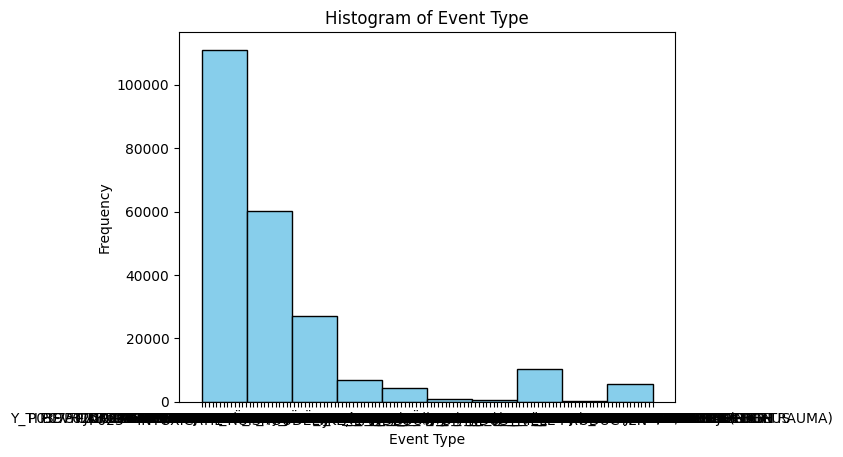

In [26]:
cad9_ina = cad9.dropna(subset=['EventType Trip'])
plt.hist(cad9_ina['EventType Trip'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.title('Histogram of Event Type')
plt.show()

In [27]:
cad9['EventType Trip'].value_counts(ascending=False)

EventType Trip
P033 - TRAUMA                          41996
P010 - ADEMHALINGSMOEILIJKHEDEN        18467
P019 - BEWUSTELOOS - COMA - SYNCOPE    13275
P012 - NIET-TRAUMATISCHE BUIKLAST      11715
P004 - CVA-TIA                         10005
                                       ...  
Z_BR BRAND VOERTUIG                        1
Y_GS ALGEMEEN+DGH                          1
Z_LO TENT                                  1
Y_KENNISGEVING+DGH                         1
Y_SI SCHEEPVAARTONGEVAL+DGH                1
Name: count, Length: 123, dtype: int64

for the event type, only keep (>5000),other recode as others

In [28]:
top1000_event=cad9['EventType Trip'].value_counts()[cad9['EventType Trip'].value_counts()>1000].index.tolist()

In [29]:
Evttype=cad9['EventType Trip'].unique().tolist()


In [30]:
others=list(set(Evttype)-set(top1000_event))

In [31]:
cad9.loc[cad9['EventType Trip'].isin(others), 'EventType Trip'] = 'others'

In [32]:
cad9['EventType Trip'].value_counts(ascending=False)

EventType Trip
P033 - TRAUMA                                       41996
P010 - ADEMHALINGSMOEILIJKHEDEN                     18467
P019 - BEWUSTELOOS - COMA - SYNCOPE                 13275
P012 - NIET-TRAUMATISCHE BUIKLAST                   11715
others                                              10907
P004 - CVA-TIA                                      10005
P001 - VERKEERSONGEVAL                               9572
P026 - ONWEL ZONDER DUIDELIJKE REDEN                 8910
P011 - PIJN OP DE BORST                              8310
P034 - SCHEDELTRAUMA                                 7988
P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST)     7494
P020 - INTOXICATIE ALCOHOL                           7250
P031 - PSYCHIATRISCH PROBLEEM                        6878
P013 - NIET-TRAUMATISCHE RUGPIJN                     4723
P015 - EPILEPSIE - STUIPEN                           4558
P017 - NIET-TRAUMATISCH BLOEDVERLIES                 4406
P026 - ONWEL/ZIEK ZONDER DUIDELIJKE FOCUS            4131

In [33]:
cad9['EventLevel Trip'].value_counts()

EventLevel Trip
N5    124109
N4     50999
N1     17197
N3     15386
N2     10314
T       4448
N6      2623
B       1057
G        190
TS       189
S         93
N7        58
L         53
IF        28
EK        23
VO        19
N8        10
5Z         5
GE         2
TP         2
SO         2
OR         2
IZ         2
VL         2
KN         1
AG         1
TC         1
OD         1
BI         1
Name: count, dtype: int64

In [34]:
eventlevel=cad9['EventLevel Trip'].unique().tolist()
eventlevel

['N5',
 'T',
 'N1',
 'N3',
 'N2',
 'N4',
 'TS',
 'N6',
 'S',
 'B',
 'VO',
 None,
 'G',
 'EK',
 '5Z',
 'L',
 'GE',
 'N7',
 'TP',
 'IF',
 'KN',
 'SO',
 'AG',
 'TC',
 'N8',
 'OR',
 'IZ',
 'OD',
 'VL',
 'BI']

In [35]:
nlevel8=cad9['EventLevel Trip'].value_counts()[cad9['EventLevel Trip'].value_counts()>1000].index.tolist()
nlevel8

['N5', 'N4', 'N1', 'N3', 'N2', 'T', 'N6', 'B']

In [36]:
other_levels=list(set(eventlevel)-set(nlevel8)) #where the count >1000
cad9.loc[cad9['EventLevel Trip'].isin(other_levels), 'EventLevel Trip'] = 'others'

In [37]:
cad9['EventLevel Trip'].value_counts()

EventLevel Trip
N5        124109
N4         50999
N1         17197
N3         15386
N2         10314
T           4448
N6          2623
B           1057
others       707
Name: count, dtype: int64

make the event level as the percentile ordinal

In [38]:
eventlevel_per=cad9['EventLevel Trip'].value_counts(normalize=True)*100
eventlevel_per.round(2)

EventLevel Trip
N5        54.71
N4        22.48
N1         7.58
N3         6.78
N2         4.55
T          1.96
N6         1.16
B          0.47
others     0.31
Name: proportion, dtype: float64

In [39]:
cad9['EventLevel Trip Percentage']=cad9['EventLevel Trip'].map(eventlevel_per)

In [40]:
cad9.head(10)


,province,Mission ID,Service Name,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,...,Departure time (T1Reported),Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID,time_period,time_intervention,EventLevel Trip Percentage
0,VBR,21221520003,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P034 - SCHEDELTRAUMA,/,...,2.0,NaN,21221520003 1969661672,19189868,21221520003,240.0,MVVILV101,midnight,44.0,54.712132
1,VBR,21221520004,MV HVP HALL West,50.743200,4.241053,AVHALL02A,ZW HALLE 2,Ambulance,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,3.0,NaN,21221520004 1969661709,19189847,21221520004,240.0,MVHALL102,midnight,38.0,54.712132
3,VBR,21221520007,HV UR VILV AZ Jan Portaels,50.926869,4.420968,UVVILV01A,MUG VILVOORDE,MUG,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,/,...,1.0,NaN,21221520007 1969665019,19190053,21221520007,0.0,MVVILV301,afternoon,582.0,1.960853
5,VBR,21221520012,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P075 - ONCOLOGISCHE PATIËNT IN BEHANDELING,/,...,3.0,NaN,21221520012 1969669593,19190140,21221520012,240.0,MVVILV101,midnight,66.0,54.712132
6,VBR,21221520013,BV LEUV 112 Hageland,50.869703,4.723870,AVLEUV02A,ZW HEVERLEE 2,Ambulance,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),/,...,2.0,NaN,21221520013 1969669643,19190103,21221520013,254.0,MVLEUV102,midnight,42.0,54.712132
7,VBR,21221520014,HB UR BRUX UZ,50.885497,4.309564,UBJETT01A,SMUR UZ BRUXELLES 1,MUG,P011 - PIJN OP DE BORST,/,...,4.0,NaN,21221520014 1969669986,19190171,21221520014,0.0,MBUZBR301,midnight,79.0,7.581114
9,VBR,21221520015,HV UR LEUV UZ Gasthuisberg,50.877462,4.674310,UVLEUV01A,MUG LEUVEN 1,MUG,P016 - ZWANGERSCHAP-BEVALLING,/,...,3.0,NaN,21221520015 1969670377,19190090,21221520015,0.0,MVLEUV301,midnight,45.0,6.782754
11,VBR,21221520017,MV HVP LEUV Oost,50.877589,4.664523,AVLEUV03A,ZW LEUVEN 3,Ambulance,P068 - UROGENITAAL PROBLEEM,/,...,3.0,NaN,21221520017 1969671559,19190138,21221520017,230.0,MVLEUV103,midnight,32.0,54.712132
12,VBR,21221520018,HV UR DIES AZ,50.988398,5.051054,AVDIES01A,ZW DIEST,Ambulance,P026 - ONWEL/ZIEK ZONDER DUIDELIJKE FOCUS,/,...,5.0,NaN,21221520018 1969674569,19190219,21221520018,224.0,MVDIES101,midnight,32.0,54.712132
13,VBR,21221520019,MV HVP LEUV Oost,50.877589,4.664523,AVLEUV03A,ZW LEUVEN 3,Ambulance,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,3.0,NaN,21221520019 1969676602,19190271,21221520019,230.0,MVLEUV103,midnight,37.0,54.712132


get the coordinators and distance

In [41]:
from geopy.distance import geodesic

In [42]:
cad9.dropna(subset=['Latitude permanence','Longitude permanence','Latitude intervention','Longitude intervention'],inplace=True)
cad9.isna().sum()

province                               0
Mission ID                             0
Service Name                       32264
Latitude permanence                    0
Longitude permanence                   0
Permanence short name                  0
Permanence long name               32264
Vector Type                            0
EventType Trip                         0
EventSubType Trip                      0
EventLevel Trip                        0
CityName intervention                 52
CitysectionName intervention        3087
Latitude intervention                  0
Longitude intervention                 0
Province invervention                 44
T0                                     0
T6                                     0
Name destination hospital          34518
Intervention time (T1Reported)     15969
Intervention time (T1Confirmed)    95104
Departure time (T1Reported)        14316
Departure time (T1Confirmed)       94255
UI                                     0
ID              

In [43]:
def calculate_distance(dataset):
    coords_1 = (dataset['Latitude permanence'], dataset['Longitude permanence'])  # Latitude and longitude of point 1
    coords_2 = (dataset['Latitude intervention'], dataset['Longitude intervention'])  # Latitude and longitude of point 2
    distance = geodesic(coords_1, coords_2).kilometers
    return distance

# Apply the function to each row of the DataFrame
cad9['calculate_distance'] = (cad9.apply(calculate_distance, axis=1))


In [44]:
cad9

,province,Mission ID,Service Name,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,...,Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID,time_period,time_intervention,EventLevel Trip Percentage,calculate_distance
0,VBR,21221520003,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P034 - SCHEDELTRAUMA,/,...,NaN,21221520003 1969661672,19189868,21221520003,240.0,MVVILV101,midnight,44.0,54.712132,3.454578
1,VBR,21221520004,MV HVP HALL West,50.743200,4.241053,AVHALL02A,ZW HALLE 2,Ambulance,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,NaN,21221520004 1969661709,19189847,21221520004,240.0,MVHALL102,midnight,38.0,54.712132,2.520552
3,VBR,21221520007,HV UR VILV AZ Jan Portaels,50.926869,4.420968,UVVILV01A,MUG VILVOORDE,MUG,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,/,...,NaN,21221520007 1969665019,19190053,21221520007,0.0,MVVILV301,afternoon,582.0,1.960853,1.195870
5,VBR,21221520012,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P075 - ONCOLOGISCHE PATIËNT IN BEHANDELING,/,...,NaN,21221520012 1969669593,19190140,21221520012,240.0,MVVILV101,midnight,66.0,54.712132,3.757139
6,VBR,21221520013,BV LEUV 112 Hageland,50.869703,4.723870,AVLEUV02A,ZW HEVERLEE 2,Ambulance,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),/,...,NaN,21221520013 1969669643,19190103,21221520013,254.0,MVLEUV102,midnight,42.0,54.712132,0.900982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289389,OVL,40231510935,BO GENT [Gentbrugge] Life Care,51.035809,3.755554,AOGENT04A,ZW GENT 4,Ambulance,P002 - AGRESSIE - VECHTPARTIJ - VERKRACHTING,/,...,0.0,40231510935 2001194481,21356701,40231510935,458.0,MOLIFE101,night,43.0,54.712132,0.623245
289390,OVL,40231510941,HO UR AALS ASZ,50.936592,4.019092,UOAALS02A,MUG AALST 2,MUG,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,1.0,40231510941 2001194793,21356685,40231510941,0.0,UOAALS02A,night,47.0,6.782754,5.622773
289392,OVL,40231510946,HO UR GERA ASZ,50.771134,3.877332,UOGERA01A,MUG GERAARDSBERGEN,MUG,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),/,...,0.0,40231510946 2001195317,21356718,40231510946,0.0,UOGERA01A,night,66.0,6.782754,13.404764
289394,OVL,40231510952,BO GENT [Gentbrugge] Life Care,51.035809,3.755554,AOGENT05A,ZW GENT 5,Ambulance,P012 - NIET-TRAUMATISCHE BUIKLAST,/,...,2.0,40231510952 2001196683,21356744,40231510952,458.0,MOLIFE102,night,23.0,54.712132,2.094664


In [45]:
cad9['calculate_distance']=cad9['calculate_distance']*1000

In [46]:
cad9.reset_index(drop=True)

,province,Mission ID,Service Name,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,...,Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID,time_period,time_intervention,EventLevel Trip Percentage,calculate_distance
0,VBR,21221520003,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P034 - SCHEDELTRAUMA,/,...,NaN,21221520003 1969661672,19189868,21221520003,240.0,MVVILV101,midnight,44.0,54.712132,3454.578482
1,VBR,21221520004,MV HVP HALL West,50.743200,4.241053,AVHALL02A,ZW HALLE 2,Ambulance,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,NaN,21221520004 1969661709,19189847,21221520004,240.0,MVHALL102,midnight,38.0,54.712132,2520.552025
2,VBR,21221520007,HV UR VILV AZ Jan Portaels,50.926869,4.420968,UVVILV01A,MUG VILVOORDE,MUG,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,/,...,NaN,21221520007 1969665019,19190053,21221520007,0.0,MVVILV301,afternoon,582.0,1.960853,1195.870135
3,VBR,21221520012,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P075 - ONCOLOGISCHE PATIËNT IN BEHANDELING,/,...,NaN,21221520012 1969669593,19190140,21221520012,240.0,MVVILV101,midnight,66.0,54.712132,3757.138913
4,VBR,21221520013,BV LEUV 112 Hageland,50.869703,4.723870,AVLEUV02A,ZW HEVERLEE 2,Ambulance,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),/,...,NaN,21221520013 1969669643,19190103,21221520013,254.0,MVLEUV102,midnight,42.0,54.712132,900.981877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181301,OVL,40231510935,BO GENT [Gentbrugge] Life Care,51.035809,3.755554,AOGENT04A,ZW GENT 4,Ambulance,P002 - AGRESSIE - VECHTPARTIJ - VERKRACHTING,/,...,0.0,40231510935 2001194481,21356701,40231510935,458.0,MOLIFE101,night,43.0,54.712132,623.245042
181302,OVL,40231510941,HO UR AALS ASZ,50.936592,4.019092,UOAALS02A,MUG AALST 2,MUG,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,1.0,40231510941 2001194793,21356685,40231510941,0.0,UOAALS02A,night,47.0,6.782754,5622.772749
181303,OVL,40231510946,HO UR GERA ASZ,50.771134,3.877332,UOGERA01A,MUG GERAARDSBERGEN,MUG,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),/,...,0.0,40231510946 2001195317,21356718,40231510946,0.0,UOGERA01A,night,66.0,6.782754,13404.764414
181304,OVL,40231510952,BO GENT [Gentbrugge] Life Care,51.035809,3.755554,AOGENT05A,ZW GENT 5,Ambulance,P012 - NIET-TRAUMATISCHE BUIKLAST,/,...,2.0,40231510952 2001196683,21356744,40231510952,458.0,MOLIFE102,night,23.0,54.712132,2094.664061


In [47]:
def transform_colname(name):
  return name.title().replace('_', ' ')

In [48]:
cad9.columns=cad9.columns.map(transform_colname).str.lower()

In [49]:
pd.set_option('display.max_columns',None)

In [50]:
cad9

,province,mission id,service name,latitude permanence,longitude permanence,permanence short name,permanence long name,vector type,eventtype trip,eventsubtype trip,eventlevel trip,cityname intervention,citysectionname intervention,latitude intervention,longitude intervention,province invervention,t0,t6,name destination hospital,intervention time (t1reported),intervention time (t1confirmed),departure time (t1reported),departure time (t1confirmed),ui,id,mission nr,ambucode,unit id,time period,time intervention,eventlevel trip percentage,calculate distance
0,VBR,21221520003,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P034 - SCHEDELTRAUMA,/,N5,MACHELEN,DIEGEM,50.896027,4.439554,VBR,2022-06-01 00:12:50,2022-06-01 00:57:15,HV UR VILV AZ JAN PORTAELS,10.0,NaN,2.0,NaN,21221520003 1969661672,19189868,21221520003,240.0,MVVILV101,midnight,44.0,54.712132,3454.578482
1,VBR,21221520004,MV HVP HALL West,50.743200,4.241053,AVHALL02A,ZW HALLE 2,Ambulance,P010 - ADEMHALINGSMOEILIJKHEDEN,/,N5,BEERSEL,HUIZINGEN,50.745594,4.276564,VBR,2022-06-01 00:11:02,2022-06-01 00:49:39,HV UR HALL AZ ST MARIA,7.0,NaN,3.0,NaN,21221520004 1969661709,19189847,21221520004,240.0,MVHALL102,midnight,38.0,54.712132,2520.552025
3,VBR,21221520007,HV UR VILV AZ Jan Portaels,50.926869,4.420968,UVVILV01A,MUG VILVOORDE,MUG,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,/,T,VILVOORDE,VILVOORDE,50.931427,4.436373,VBR,2022-07-14 16:54:37,2022-06-01 02:36:54,HV UR VILV AZ JAN PORTAELS,7.0,NaN,1.0,NaN,21221520007 1969665019,19190053,21221520007,0.0,MVVILV301,afternoon,582.0,1.960853,1195.870135
5,VBR,21221520012,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P075 - ONCOLOGISCHE PATIËNT IN BEHANDELING,/,N5,MACHELEN,DIEGEM,50.892590,4.436498,VBR,2022-06-01 02:24:32,2022-06-01 03:30:44,HB UR BRUX UZ,13.0,NaN,3.0,NaN,21221520012 1969669593,19190140,21221520012,240.0,MVVILV101,midnight,66.0,54.712132,3757.138913
6,VBR,21221520013,BV LEUV 112 Hageland,50.869703,4.723870,AVLEUV02A,ZW HEVERLEE 2,Ambulance,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),/,N5,LEUVEN,KESSEL-LO,50.877542,4.727086,VBR,2022-06-01 02:22:30,2022-06-01 03:04:32,HV UR LEUV RZ HEILIG HART,12.0,NaN,2.0,NaN,21221520013 1969669643,19190103,21221520013,254.0,MVLEUV102,midnight,42.0,54.712132,900.981877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289389,OVL,40231510935,BO GENT [Gentbrugge] Life Care,51.035809,3.755554,AOGENT04A,ZW GENT 4,Ambulance,P002 - AGRESSIE - VECHTPARTIJ - VERKRACHTING,/,N5,GENT,LEDEBERG,51.035609,3.746674,OVL,2023-05-31 23:18:24,2023-06-01 00:01:58,UZ GENT,2.0,1.0,1.0,0.0,40231510935 2001194481,21356701,40231510935,458.0,MOLIFE101,night,43.0,54.712132,623.245042
289390,OVL,40231510941,HO UR AALS ASZ,50.936592,4.019092,UOAALS02A,MUG AALST 2,MUG,P010 - ADEMHALINGSMOEILIJKHEDEN,/,N3,AALST,MOORSEL,50.947596,4.097173,OVL,2023-05-31 23:23:06,2023-06-01 00:10:16,OLV AALST,11.0,9.0,3.0,1.0,40231510941 2001194793,21356685,40231510941,0.0,UOAALS02A,night,47.0,6.782754,5622.772749
289392,OVL,40231510946,HO UR GERA ASZ,50.771134,3.877332,UOGERA01A,MUG GERAARDSBERGEN,MUG,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),/,N3,NINOVE,MEERBEKE,50.827590,4.045310,OVL,2023-05-31 23:32:03,2023-06-01 00:38:59,OLV AALST,17.0,15.0,2.0,0.0,40231510946 2001195317,21356718,40231510946,0.0,UOGERA01A,night,66.0,6.782754,13404.764414
289394,OVL,40231510952,BO GENT [Gentbrugge] Life Care,51.035809,3.755554,AOGENT05A,ZW GENT 5,Ambulance,P012 - NIET-TRAUMATISCHE BUIKLAST,/,N5,GENT,SINT-AMANDSBERG,51.053936,3.747475,OVL,2023-05-31 23:56:18,2023-06-01 00:19:23,AZ SINT LUCAS GENT,8.0,8.0,2.0,2.0,40231510952 2001196683,21356744,40231510952,458.0,MOLIFE102,night,23.0,54.712132,2094.664061


In [51]:
cad9.to_parquet('cad9_clean.parquet', index=False) 

In [52]:
intvn=pd.read_csv("intvn_clean.csv")

In [53]:
intvn

,mission id,service name,postalcode permanence,cityname permanence,streetname permanence,latitude permanence,longitude permanence,permanence short name,permanence long name,vector type,eventtype firstcall,eventlevel firstcall,eventtype trip,eventlevel trip,postalcode intervention,cityname intervention,latitude intervention,longitude intervention,province intervention,t0,t6,waiting time,intervention duration,departure time (t1reported),departure time (t1confirmed),name destination hospital,cityname destination hospital,streetname destination hospital,calculated traveltime destinatio,calculated distance destination,number of transported persons,abandon reason,time period,time intervention,eventlevel firstcall percentage,same event type,smae event level
0,10221520001,HA UR MECH AZ St Maarten,2800.0,Mechelen (Mechelen),Liersesteenweg,51.05102,4.47803,AAMECH01A,ZW MECHELEN 1,Ambulance,P020 - Intoxication alcohol,N5,P020 - Intoxication alcohol,N5,NaN,Lier (Lier),51.12496,4.57408,ANT,2022-06-01 00:01:34,2022-06-01 00:28:18.934,16.0,27.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Verzorgd ter plaatse,midnight,26.0,79.033900,1,1
1,10221520002,HA UR ANTW Stuivenberg,2060.0,Antwerpen (Antwerpen),Lange Beeldekensstraat,51.22249,4.43629,UAANTW01A,MUG ANTWERPEN 1,MUG,P068 - Urogenital problem,N5,P068 - Urogenital problem,N1,NaN,Stabroek (Hoevenen),51.30626,4.40502,ANT,2022-06-01 00:03:51,2022-06-01 01:06:52.142,32.0,63.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,midnight,63.0,79.033900,1,0
2,10221520004,BA ANTW [Borgerhout] AMBUCE,2140.0,Antwerpen (Borgerhout),Gijselsstraat,51.21562,4.44392,AAANTW07A,ZW ANTWERPEN 7,Ambulance,P033 - Trauma,N5,P033 - Trauma,N5,NaN,Antwerpen (Merksem),51.23878,4.44533,ANT,2022-06-01 00:08:56,2022-06-01 00:40:57.191,19.0,32.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Zonder patient,midnight,32.0,79.033900,1,1
3,10221520005,BA WIJN AMBUCE,2110.0,Wijnegem (Wijnegem),Bijkhoevelaan,51.23355,4.49318,AAWIJN01A,ZW WIJNEGEM 1,Ambulance,P022 - Intoxication medication,N5,P022 - Intoxication medication,N5,NaN,Schoten (Schoten),51.25071,4.51299,ANT,2022-06-01 00:10:38,2022-06-01 01:23:34.290,15.0,73.0,3.0,2.0,HA UR ANTW Jan Palfijn,Antwerpen (Merksem),Lange Bremstraat,530.0,5468.0,1.0,NaN,midnight,72.0,79.033900,1,1
4,10221520006,FA HVP BEER Taxandria,2340.0,Beerse (Beerse),Bisschopslaan,51.31482,4.85623,AABEER01A,ZW BEERSE 1,Ambulance,P033 - Trauma,N4,P033 - Trauma,N4,NaN,Beerse (Beerse),51.33113,4.79938,ANT,2022-06-01 00:14:38,2022-06-01 01:04:24.123,12.0,50.0,3.0,3.0,HA UR TURN AZ St Elisabeth,Turnhout (Turnhout),Rubensstraat,859.0,13231.0,1.0,NaN,midnight,49.0,0.831988,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338482,90230900234,FH PDS LOUV Hainaut Centre,7100.0,La Louvi√®re (La Louvi√®re),Boulevard du Roi Baudouin,50.46800,4.19217,AHLOUV01A,ZS LA LOUVIERE 1,Ambulance,P038 - Person does not answer the call,N5,P038 - Person does not answer the call,N5,NaN,La Louvi√®re (Saint-Vaast),50.46244,4.16772,NAM,2023-03-31 23:24:49,2023-03-31 23:42:16.377,NaN,18.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Geannuleerd,night,17.0,79.033900,1,1
338483,90230900236,FN PDS BEAU DINAPHI,5570.0,Beauraing (Beauraing),Rue de Rochefort,50.12046,4.97894,ANBEAU01A,ZS BEAURAING 1,Ambulance,P010 - Respiratory problems,N5,P010 - Respiratory problems,N5,NaN,Beauraing (Baronville),50.12462,4.95531,NAM,2023-03-31 23:33:31,2023-04-01 00:16:07.521,8.0,43.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Verzorgd ter plaatse,night,42.0,79.033900,1,1
338484,90230900237,FN PDS DINA DINAPHI,5500.0,Dinant (Dinant),Rue de Philippeville,50.25363,4.89808,ANDINA01A,ZS DINANT 1,Ambulance,P020 - Intoxication alcohol,N5,P020 - Intoxication alcohol,N5,NaN,Dinant (Dinant),50.24344,4.92171,NAM,2023-03-31 23:41:10,2023-04-01 00:16:10.139,8.0,35.0,2.0,2.0,HN UR DINA CHU,Dinant (Dinant),Rue Saint-Jacques,311.0,5040.0,1.0,NaN,night,35.0,79.033900,1,1
338485,90230900238,FN PDS METT Val Sambre,5640.0,Mettet (Me

In [54]:
intvn.to_parquet("intvn_clean.parquet",index=False)

In [55]:
intvn1_bxl1_clean=pd.read_csv("intvn1_bxl1_clean.csv")

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_21781/632794400.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  intvn1_bxl1_clean=pd.read_csv("intvn1_bxl1_clean.csv")


In [56]:
intvn1_bxl1_clean

,mission id,service name,postalcode permanence,cityname permanence,streetname permanence,latitude permanence,longitude permanence,permanence short name,permanence long name,vector type,eventtype firstcall,eventlevel firstcall,eventtype trip,eventlevel trip,postalcode intervention,cityname intervention,latitude intervention,longitude intervention,t0,t6,waiting time,intervention duration,departure time t1reported,name destination hospital,postalcode destination hospital,cityname destination hospital,streetname destination hospital,calculated traveltime departure,calculated distance departure to,calculated traveltime destinatio,calculated distance destination,number of transported persons,abandon reason,time period,time intervention,eventlevel type percentage,same event type,smae event level
0,20222490019,HB UR BRUX Europe Michel,1040,Etterbeek (Etterbeek),Charles Degrouxstraat,50.842260,4.399250,ABETTE01A,AMB ST MICHEL,Ambulance,P033 - Trauma,N5,P033 - Trauma,N5,1200.0,Woluwe-Saint-Lambert (Woluwe-Saint-Lambert),50.8561.0,4.43169.0,2022-09-06 11:26:48.337914700+00:00,2022-09-06 13:04:57.801767600+00:00,29.0,98.0,2.0,HB UR BRUX CU St Luc,1200.0,Sint-Lambrechts-Woluwe (Sint-Lambrechts-Woluwe),Avenue Hippocrate,297.0,3769.0,165.0,1894.0,2.0,NaN,noon,98.0,79.033900,1,1
1,20222490020,FB PDS WOLL [PASI UCL] SIAMU,1200,Woluwe-Saint-Lambert (Woluwe-Saint-Lambert),Avenue Hippocrate - Hippokrateslaan,50.852110,4.460400,ABWOLL01A,AMB UCL 1,Ambulance,P020 - Intoxication alcohol,N5,P020 - Intoxication alcohol,N5,1150.0,Sint-Pieters-Woluwe (Sint-Pieters-Woluwe),50.84039.0,4.46537.0,2022-09-06 11:38:06.222519900+00:00,2022-09-06 12:20:34.853799700+00:00,42.0,42.0,6.0,HB UR BRUX CU St Luc,1200.0,Sint-Lambrechts-Woluwe (Sint-Lambrechts-Woluwe),Avenue Hippocrate,241.0,2591.0,245.0,2173.0,1.0,NaN,noon,42.0,79.033900,1,1
2,20222490023,FB PDS ANDE [PASI Anderlecht] SIAMU,1070,Anderlecht,Bergense Steenweg,50.832540,4.311990,ABANDE04A,AMB AND 4,Ambulance,others,N5,P074 - Palliative patient,N5,1601.0,Sint-Pieters-Leeuw (Ruisbroek),50.78068.0,4.2896.0,2022-09-06 11:59:12.037305200+00:00,2022-09-06 13:32:05.944450600+00:00,NaN,93.0,0.0,HB UR BRUX CUH Erasme,1070.0,Anderlecht (Anderlecht),Route de Lennik,486.0,7329.0,414.0,6428.0,NaN,NaN,noon,92.0,79.033900,0,1
3,20222490026,FB PDS IXEL [PASI Delta] SIAMU,1050,Elsene,Boulevard du Triomphe,50.818870,4.403110,ABIXEL02A,AMB DELTA 2,Ambulance,P033 - Trauma,N5,P033 - Trauma,N5,1170.0,Watermael-Boitsfort (Watermael-Boitsfort),50.80364.0,4.39922.0,2022-09-06 12:12:20.598000700+00:00,2022-09-06 13:08:34.058504800+00:00,9.0,56.0,NaN,HB UR BRUX CHIREC Delta,1160.0,Oudergem,Triomflaan,237.0,2374.0,254.0,2520.0,1.0,NaN,noon,56.0,79.033900,1,1
4,20222490028,HB UR BRUX Iris Sud Etterbeek,1050,Elsene (Elsene),Rue Jean Paquot,50.825831,4.378717,PBIXEL01A,AMB CRK-PIT 1,PIT,P015 - Epilepsy - convulsions,N3,P015 - Epilepsy - convulsions,N3,1000.0,Bruxelles (Bruxelles),50.84889.0,4.35262.0,2022-09-06 12:14:04.714840+00:00,2022-09-06 13:19:37.638291400+00:00,21.0,65.0,5.0,HB UR BRUX St Jean,1000.0,Brussel (Brussel),Broekstraat,352.0,4249.0,95.0,833.0,1.0,NaN,noon,65.0,7.867875,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40682,20231510389,FB PDS BRUX [Caserne HÈliport] SIAMU,1000,Bruxelles (Bruxelles),Avenue de l'HÈliport,50.859460,4.351810,ABBRUX02A,AMB HELI 2,Ambulance,P026 - Unclear problem,N5,P026 - Unclear problem,N5,1000.0,Bruxelles (Bruxelles),50.85465.0,4.36009.0,2023-05-31 21:05:54.330475300+00:00,2023-05-31 21:40:35.781017300+00:00,7.0,35.0,2.0,HB UR BRUX St Jean,1000.0,Brussel (Brussel),Broekstraat,122.0,1242.0,67.0,614.0,NaN,NaN,night,34.0,79.033900,1,1
40683,20231510390,HB UR BRUX CHU St Pierre,1000,Brussel (Brussel),Rue Haute,50.834330,4.345450,ABBRUX06A,AMB HSP 1,Ambulance,P033 - Trauma,N5,P033 - Trauma,N5,1060.0,Saint-Gilles (Saint-Gilles),50.83711.0,4.33613.0,2023-05-31 21:18:37.428443800+00:00,2

In [57]:
intvn1_bxl1_clean.to_parquet("intvn1_bxl1_clean.parquet",index=False)